<a href="https://colab.research.google.com/github/ummaysumaiya0808/Anomaly-detection-in-time-series-and-stock-market/blob/main/Anomaly_Detection_in_time_series_and_Stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
!pip install adtk

In [85]:
!pip install yfinance

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import *

In [87]:
data=pd.read_csv('/content/monthly_csv.csv')

In [88]:
data

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


In [89]:
data['Date']= pd.to_datetime(data['Date'])

In [90]:
data=data.set_index('Date')
data=data['Mean']


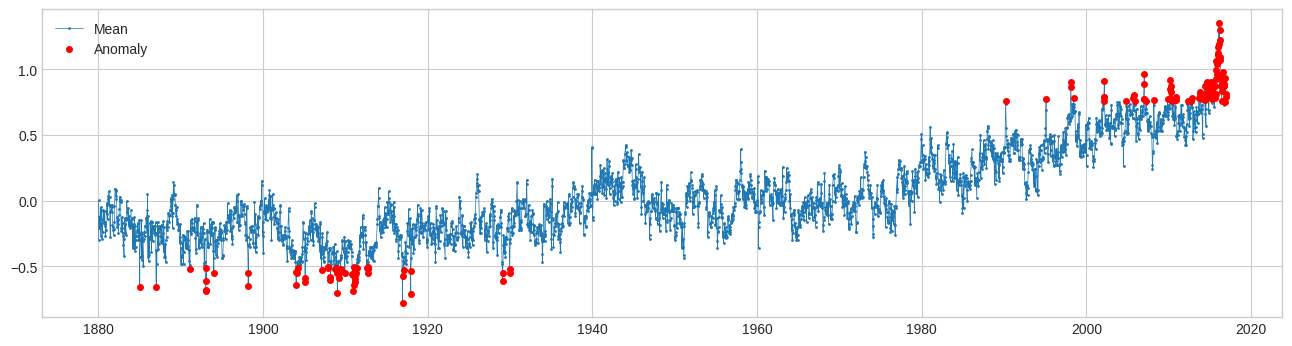

In [91]:
threshold_detector=ThresholdAD(low=-0.5, high=0.75)
anomalies=threshold_detector.detect(data)
plot(data, anomaly= anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

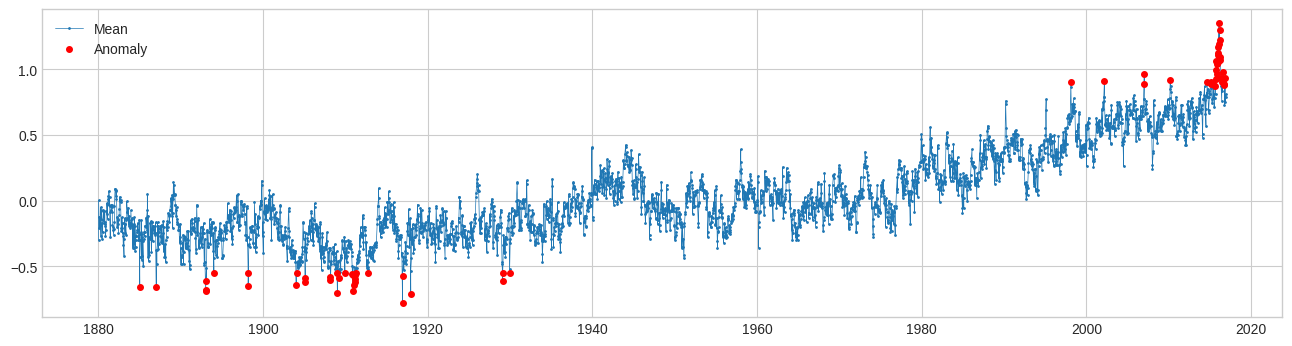

In [92]:
quantile_detector=QuantileAD(low=0.01, high=0.99)
anomalies=quantile_detector.fit_detect(data)
plot(data, anomaly= anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

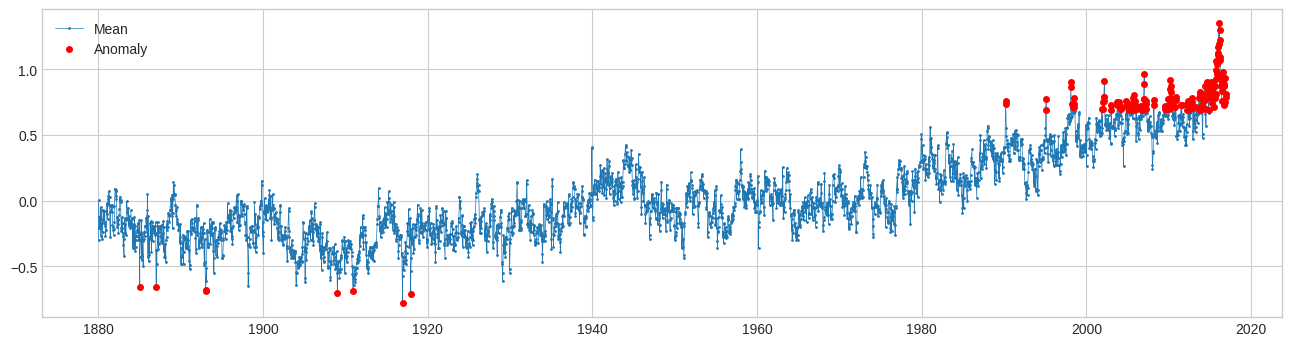

In [93]:
iqr_detector=InterQuartileRangeAD(c=1)
anomalies=iqr_detector.fit_detect(data)
plot(data, anomaly= anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

In [94]:
data=validate_series(data)

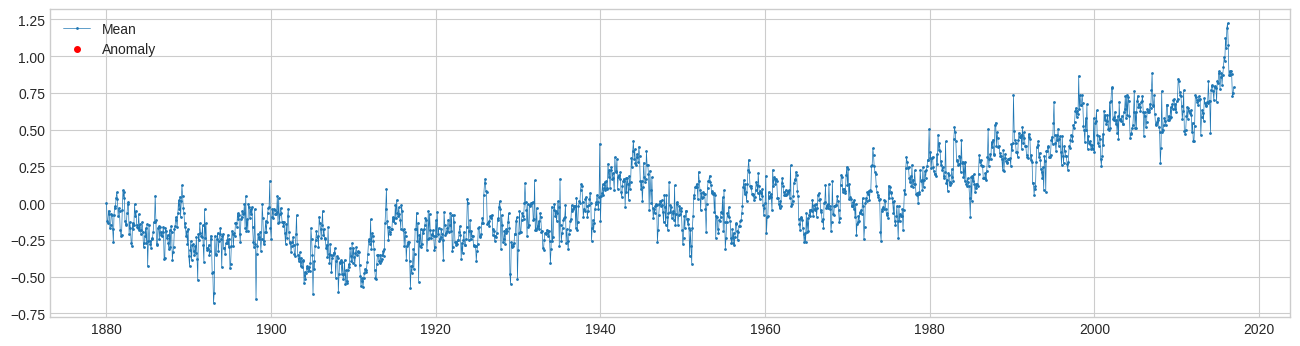

In [95]:
esd_ad=GeneralizedESDTestAD(alpha=0.3)
anomalies=esd_ad.fit_detect(data)
plot(data, anomaly= anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

# To segmentize anomaly intrusions with vertical lines

In [99]:
data

Date
1880-01-06    0.0009
1880-02-06   -0.1229
1880-03-06   -0.1357
1880-04-06   -0.0499
1880-05-06   -0.0738
               ...  
2016-08-06    0.8998
2016-09-06    0.8767
2016-10-06    0.7292
2016-11-06    0.7504
2016-12-06    0.7895
Name: Mean, Length: 1644, dtype: float64

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


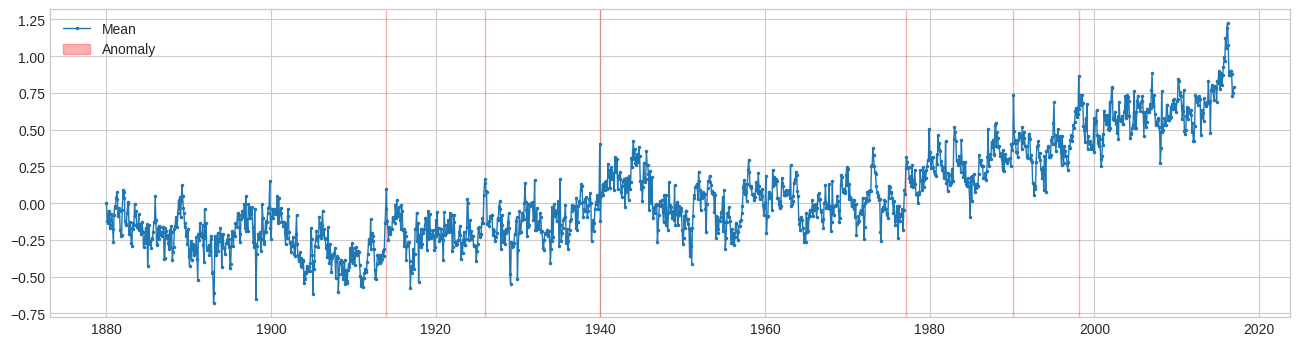

In [105]:
persist_detector=PersistAD(c=2.5, side='positive')
persist_detector.window = 16    #To calculate how many days are analyzed
anomalies= persist_detector.fit_detect(data)
plot(data, anomaly= anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red')
plt.show()

In [107]:
from adtk.detector import VolatilityShiftAD

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


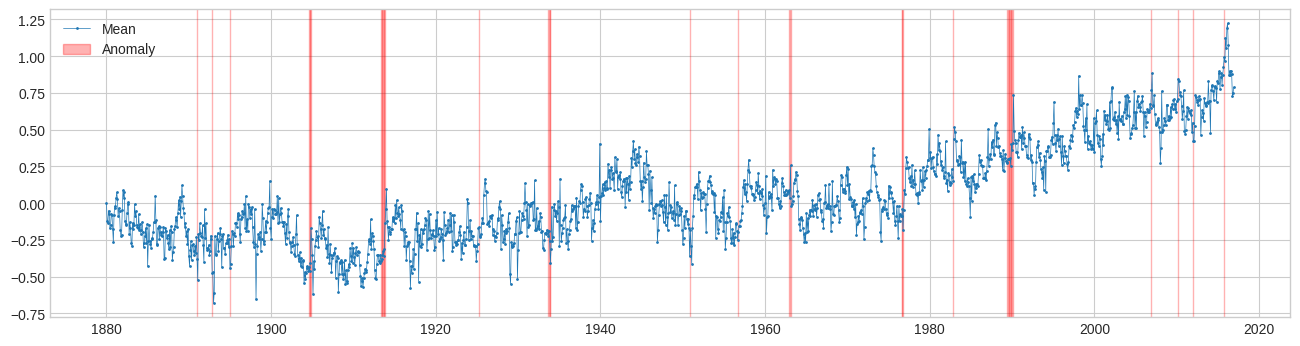

In [116]:
volatility_detector=VolatilityShiftAD(c=2.5, side='positive', window=10)
anomalies= volatility_detector.fit_detect(data)
plot(data, anomaly= anomalies, anomaly_color='red')
plt.show()

# *Anomaly detection over stock market*

In [122]:
st=pd.read_csv('/content/Stock_data.csv', index_col='Date', parse_dates= True, squeeze=True)

<ipython-input-122-30bda1162220>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  st=pd.read_csv('/content/Stock_data.csv', index_col='Date', parse_dates= True, squeeze=True)


In [124]:
st

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [123]:
stock= validate_series(st)
stock

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60


/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int
/usr/local/lib/python3.10/dist-packa

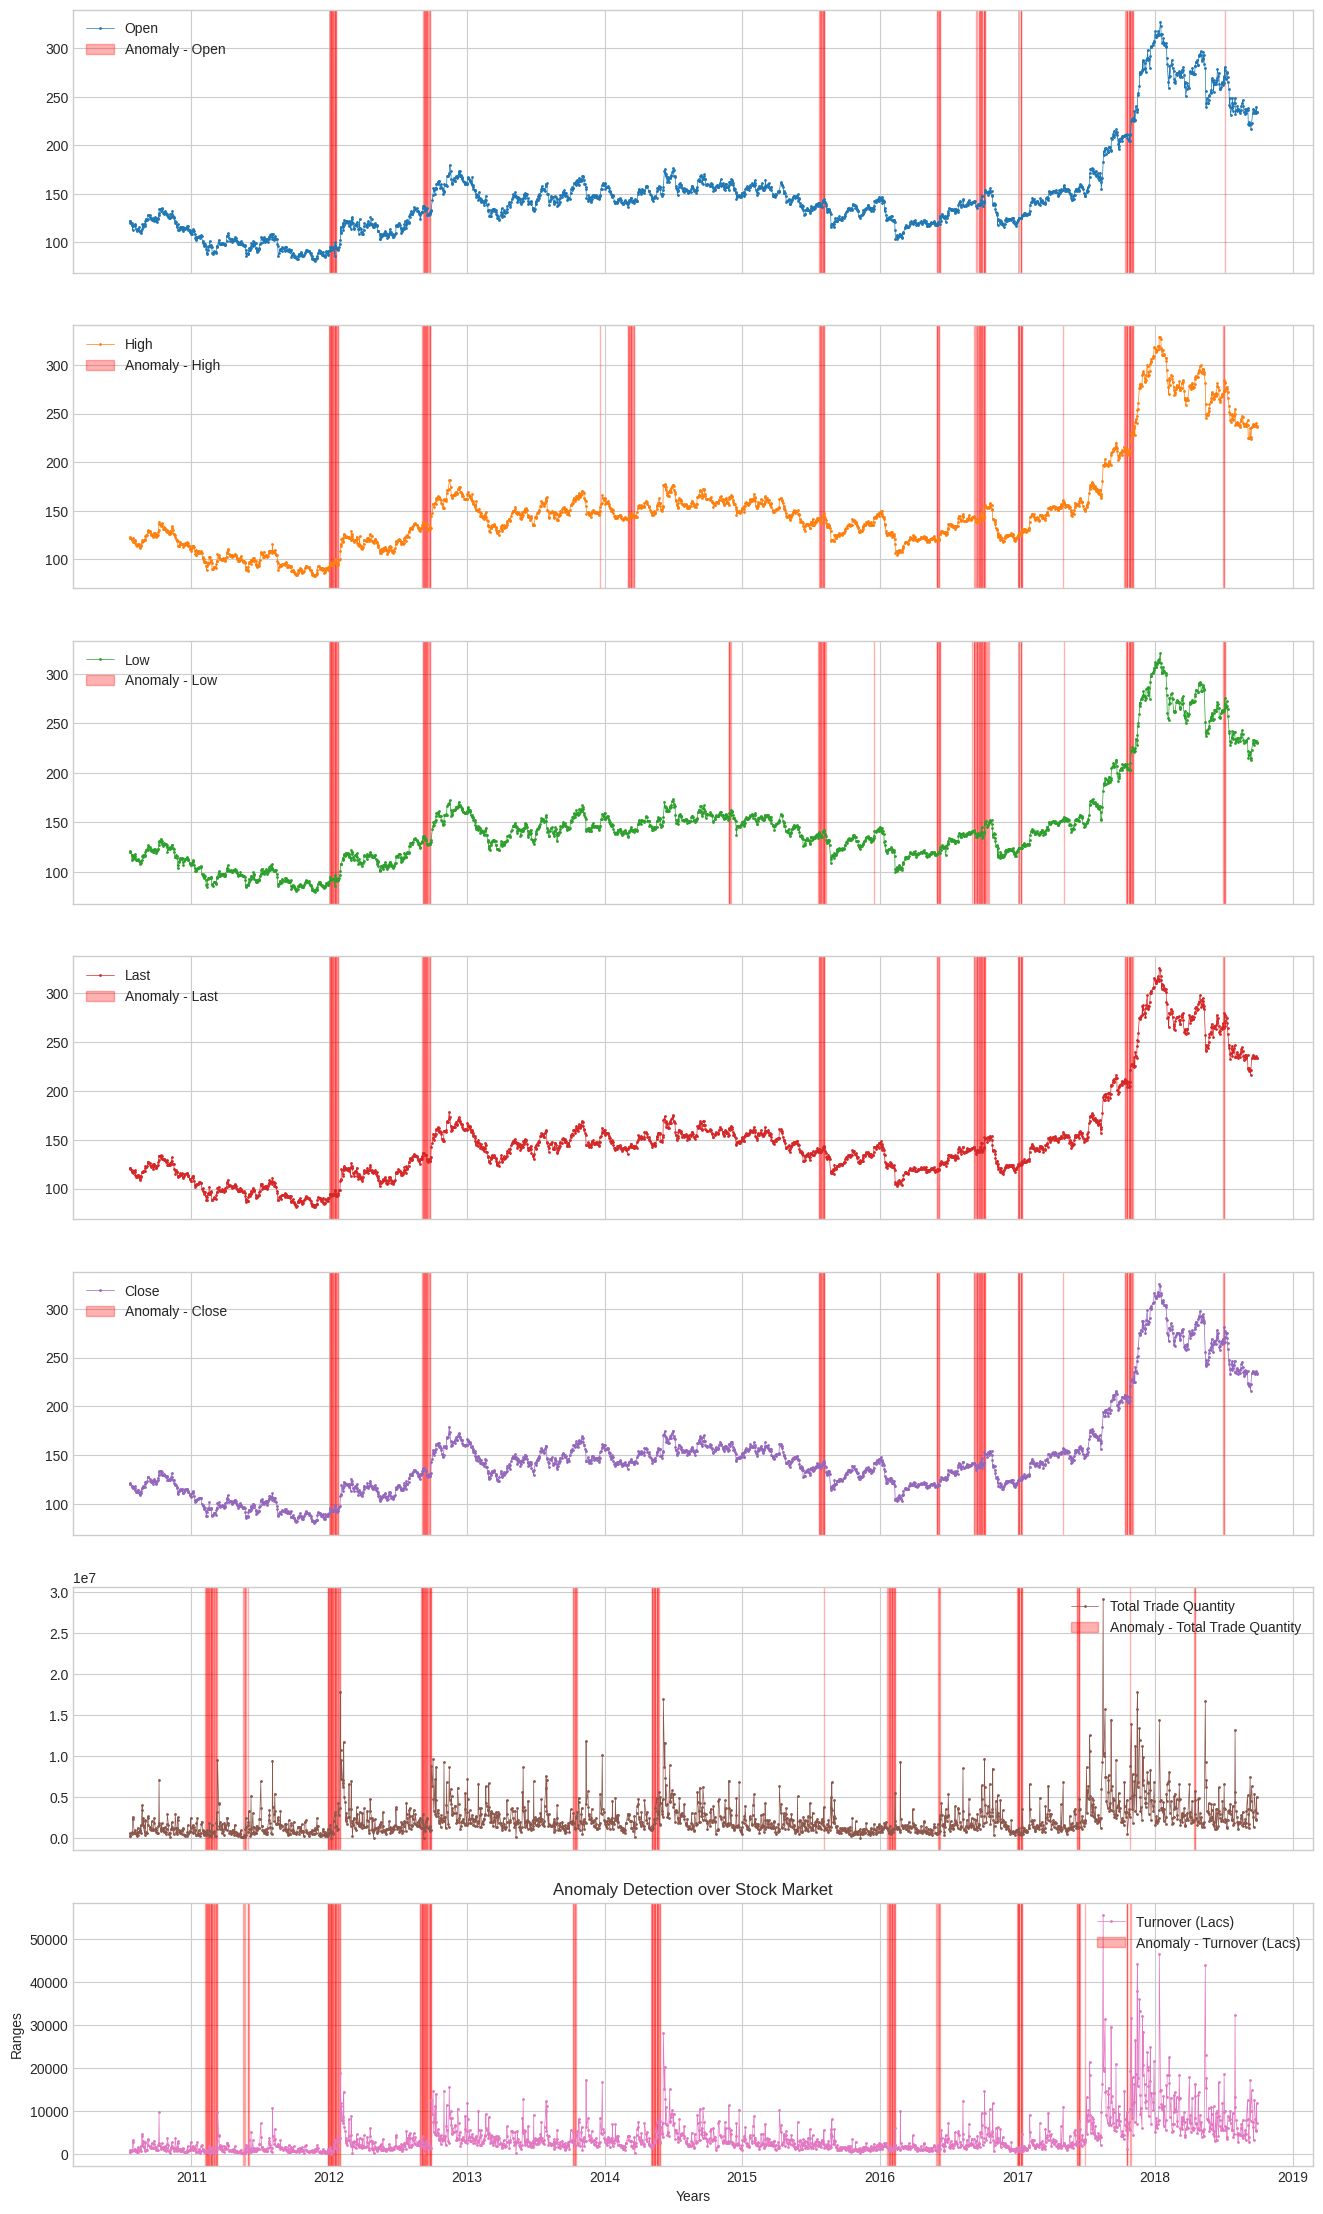

In [127]:
volatility_detector=VolatilityShiftAD(c=2.5, side='positive', window=25)
anomalies= volatility_detector.fit_detect(stock)
plot(stock, anomaly= anomalies, anomaly_color='red')
plt.xlabel('Years')
plt.ylabel('Ranges')
plt.title('Anomaly Detection over Stock Market')
plt.show()

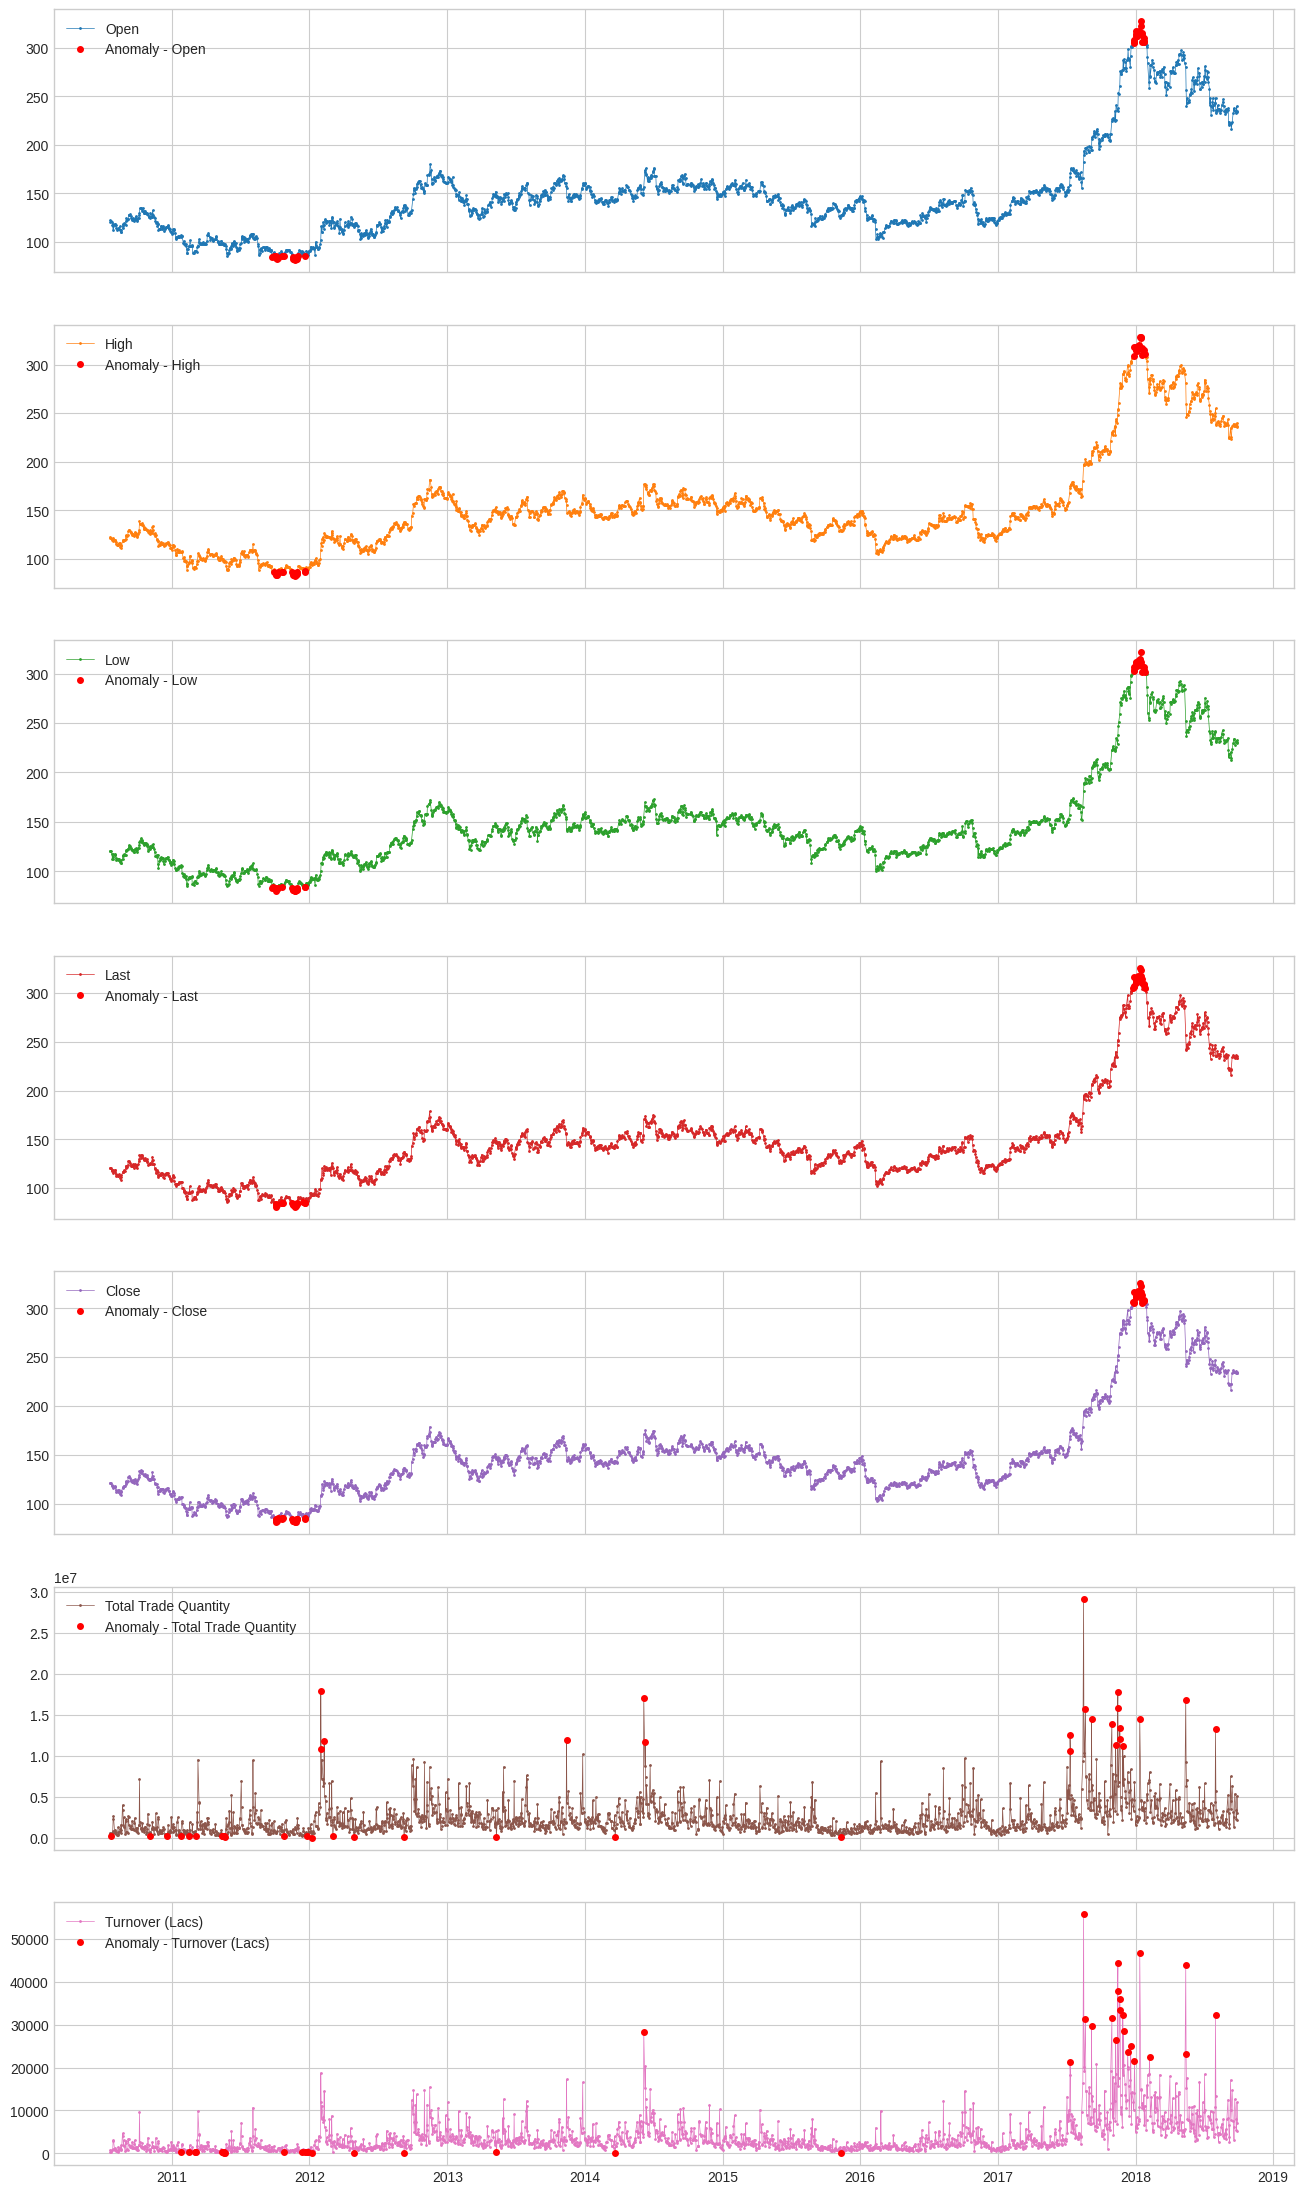

In [125]:
quantile_detector=QuantileAD(low=0.01, high=0.99)
anomalies=quantile_detector.fit_detect(st)
plot(st, anomaly= anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()